Dieses Skript visualisiert die Artefaktdauerverteilung für Augen- und Muskelartefakte.

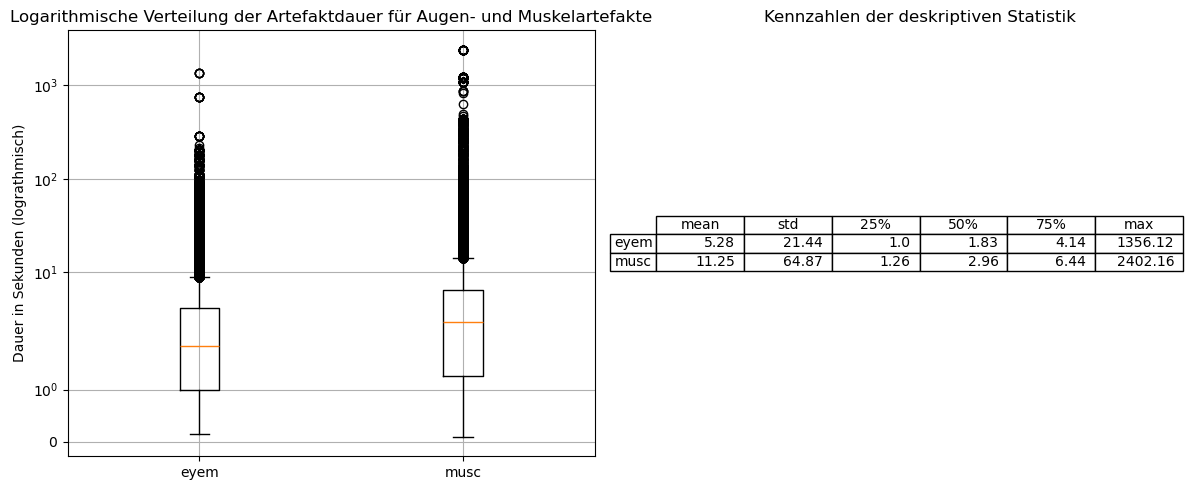

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import os

dfs = []

for root, dirs, files in os.walk('../../../../tuar/edf/'):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df_tmp = pd.read_csv(file_path, comment='#')
            dfs.append(df_tmp.query("label in ['eyem', 'musc']"))
            
df = pd.concat(dfs)
df['duration'] = df['stop_time'] - df['start_time']
eyem_duration = df[df['label'] == 'eyem']['duration']
musc_duration = df[df['label'] == 'musc']['duration']


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot([eyem_duration, musc_duration], tick_labels=["eyem", "musc"], vert=True)
axes[0].set_yscale('symlog')
axes[0].set_title('Logarithmische Verteilung der Artefaktdauer für Augen- und Muskelartefakte')
axes[0].set_ylabel('Dauer in Sekunden (lograthmisch)')
axes[0].grid(True)

axes[1].table(
    cellText = [
        eyem_duration.describe().drop(['count', 'min']).round(2).values,
        musc_duration.describe().drop(['count', 'min']).round(2).values
    ],
    rowLabels = ['eyem', 'musc'],
    colLabels = eyem_duration.describe().drop(['count', 'min']).index,
    loc = 'center'
)
axes[1].axis('off')
axes[1].set_title('Kennzahlen der deskriptiven Statistik')

plt.tight_layout()
plt.savefig("./output/exp_01_06_eyem_musc_artifact_duration_distribution.svg")
plt.show()